In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
data = pd.read_csv('Cardiotocographic.csv')
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [5]:
data.shape

(2126, 14)

In [6]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


# Handle Missing Values

In [8]:
missing_values = data.isnull().sum()
print(missing_values)
data.fillna(data.mean(), inplace=True) 

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


# Identify and Correct Data Types

In [9]:
print(data.dtypes)
data['LB'] = pd.to_numeric(data['LB'], errors='coerce')

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


# Detect and Treat Outliers

In [10]:
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
outliers = detect_outliers(data)
print(outliers)

{'LB':               LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV      Width  Tendency     NSP  
134   58.000000  0.500000   0.0   7.9   44.

# 2. Statistical Summary

In [11]:
stat_summary = data.describe()
print(stat_summary)
high_std = stat_summary.loc['std'] > 10 
print(stat_summary.loc[:, high_std])

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

# 3.Data Visualization
## HISTOGRAM

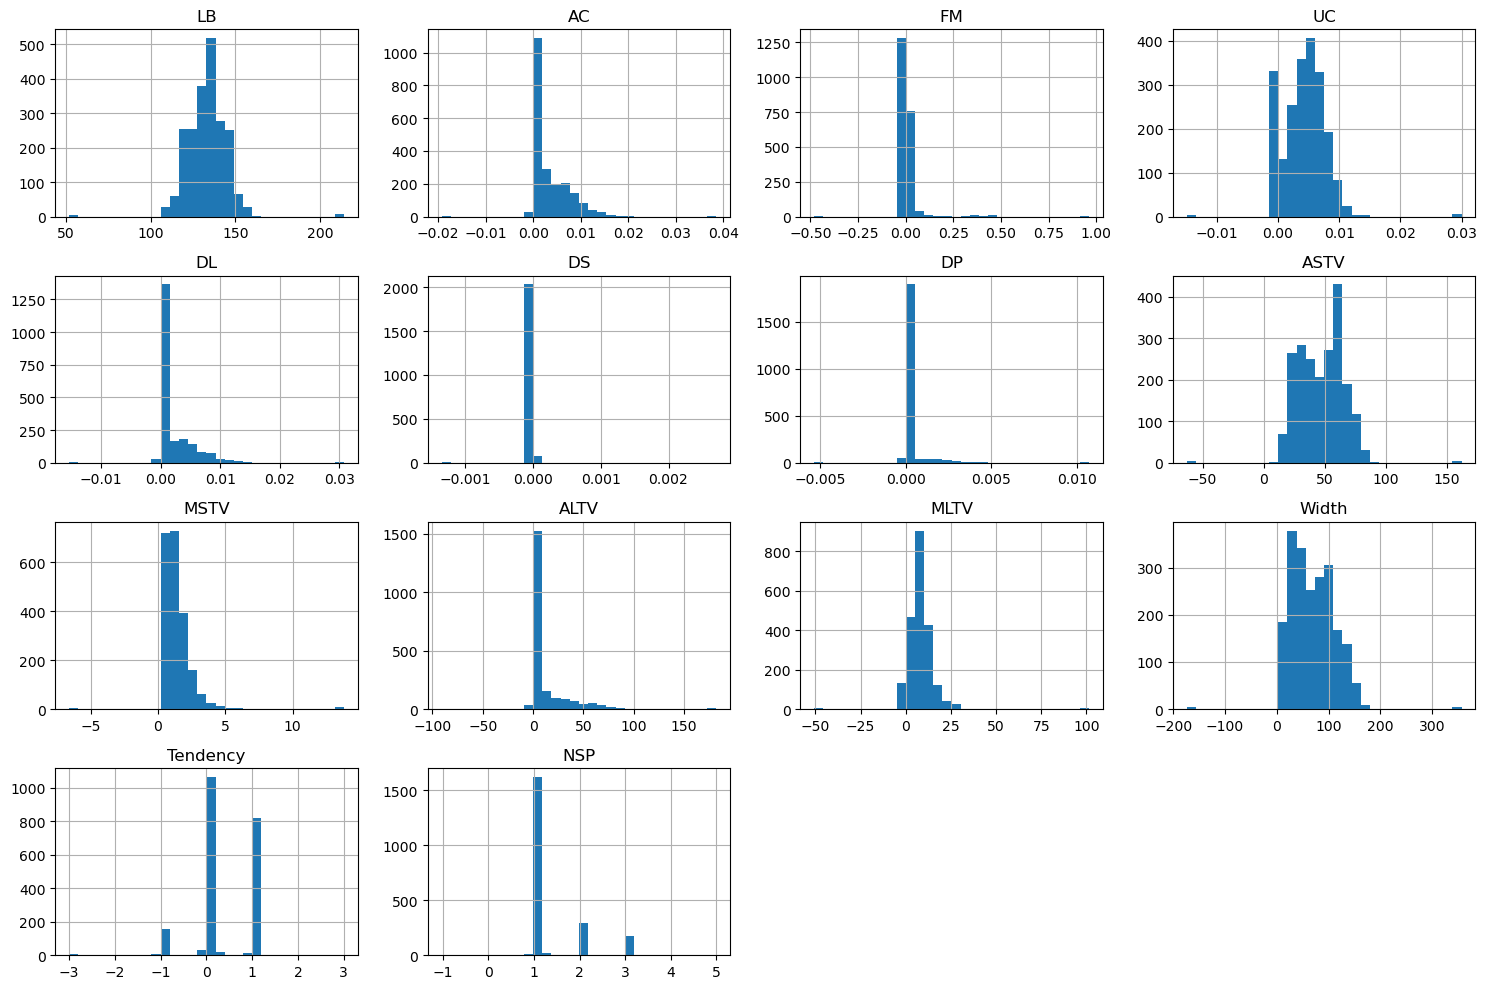

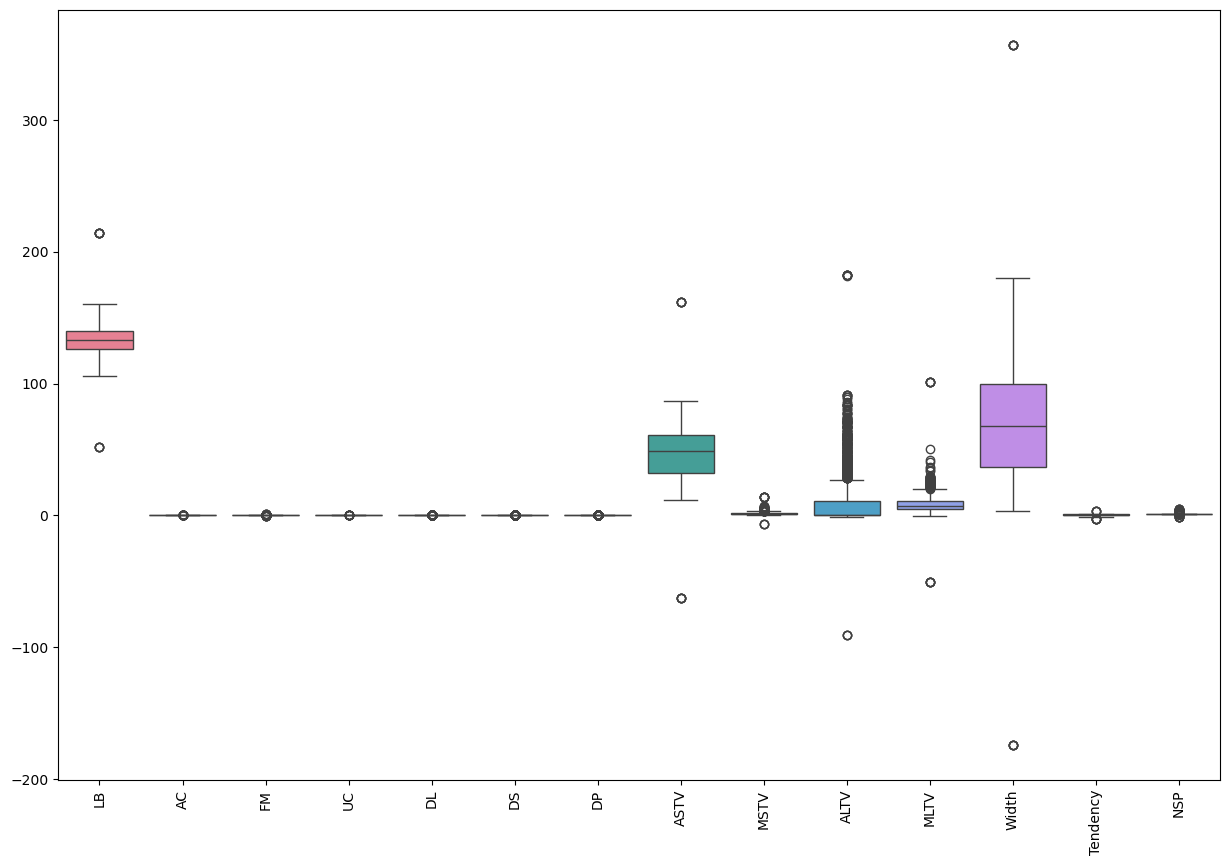

In [12]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Bar Charts and Pie Charts

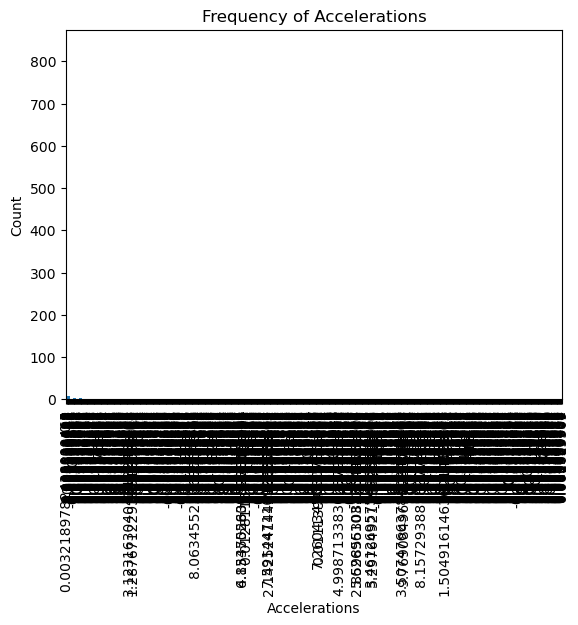

In [13]:
data['AC'].value_counts().plot(kind='bar')
plt.title('Frequency of Accelerations')
plt.xlabel('Accelerations')
plt.ylabel('Count')
plt.show()

## Scatter Plots and Correlation Heatmaps

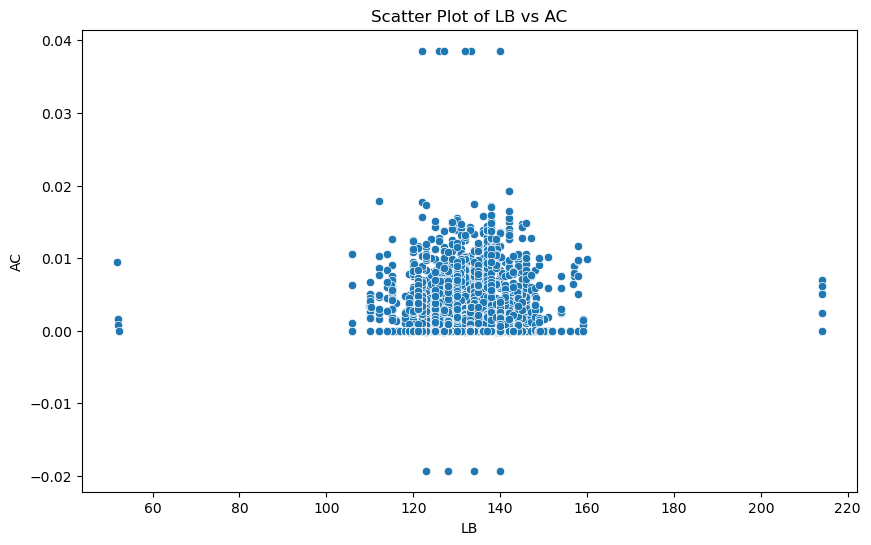

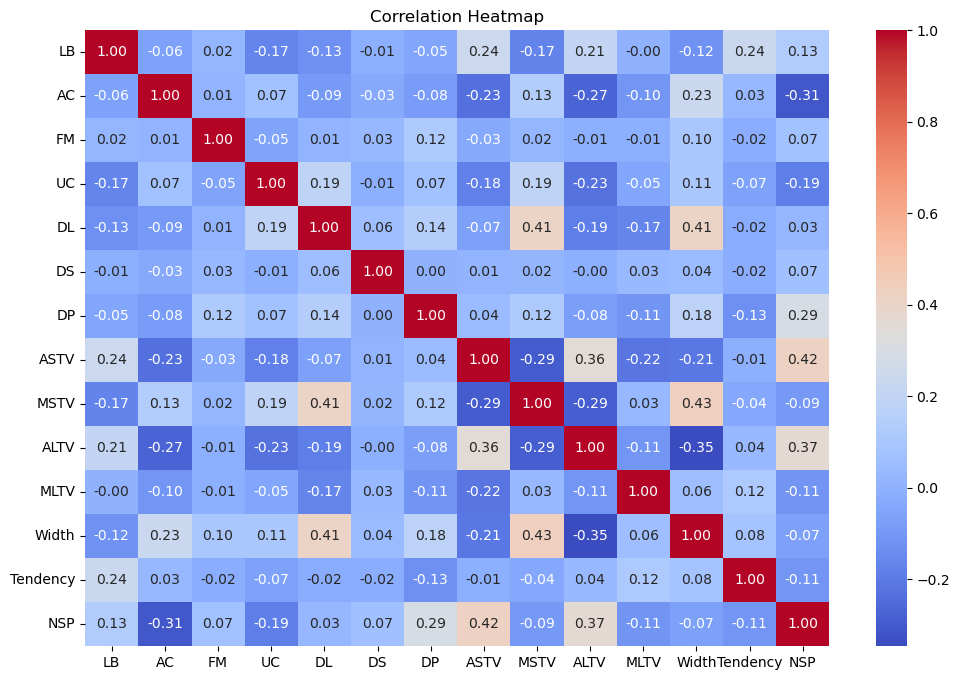

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='AC', data=data)
plt.title('Scatter Plot of LB vs AC')
plt.show()
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Pattern Recognition and Insights
## Correlation analysis

In [37]:
correlations = data.corr()
print(correlations)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01

# 5. Conclusion

The exploratory analysis of the "cardiographic.csv" dataset has provided valuable insights into the patterns and relationships among various fetal heart rate metrics and uterine activity indicators. Here are the key findings and implications drawn from the analysis:

1. Statistical Insights: The statistical summary revealed a diverse range of fetal heart rate metrics, such as baseline FHR (LB), accelerations (AC), and decelerations (DL, DS, DP). Notably, certain variables exhibited high variability, indicating potential fluctuations in fetal well-being.

2. Data Distribution: The visualizations, including histograms and boxplots, highlighted the distributions of key variables. The presence of outliers in specific metrics, such as decelerations, signals the need for careful monitoring of fetal health during labor. 

3. Correlations and Relationships: The correlation heatmap unveiled interesting relationships between variables. For example, a positive correlation between accelerations and baseline FHR may imply that increased fetal movement is associated with a healthier fetal state.

4. Visual Patterns: The pair plots and scatter plots allowed for deeper exploration of relationships between pairs of variables. These visualizations revealed clusters and trends that could help clinicians identify at-risk pregnancies.

5. Clinical Implications: The findings from this analysis underscore the importance of continuous monitoring of fetal heart rate patterns and uterine activity during labor. 

6. Recommendations for Further Analysis: Future analyses could benefit from integrating additional data, such as maternal health indicators, demographic information, and outcomes of labor. 